In [24]:
# load vine dataset from scikit-learn
import torch 
from matplotlib import pyplot as plt
from sklearn.datasets import load_wine
torch.manual_seed(1234)

# load dataset
data = load_wine()
import pandas as pd
df=pd.DataFrame(data["data"],columns=data["feature_names"])
y=df["alcohol"]
x=df.drop("alcohol",axis=1)

In [25]:
# scale data

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(x)
x_scaled=scaler.transform(x)

x=pd.DataFrame(x_scaled,columns=x.columns)
x.head()

,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [26]:

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1234)
x_train_tensor=torch.tensor(x_train.values, dtype=torch.float32)

In [27]:
def relu(x):
    return torch.max(torch.tensor(0.0), x)

def root_mean_squared_error(y_hat,y):
    return torch.sqrt(torch.mean((y_hat-y)**2))

def get_batch(x,y,batch_size):
    for i in range(0,len(x),batch_size):
        # yield: return a generator
        yield x[i:i+batch_size],y[i:i+batch_size]

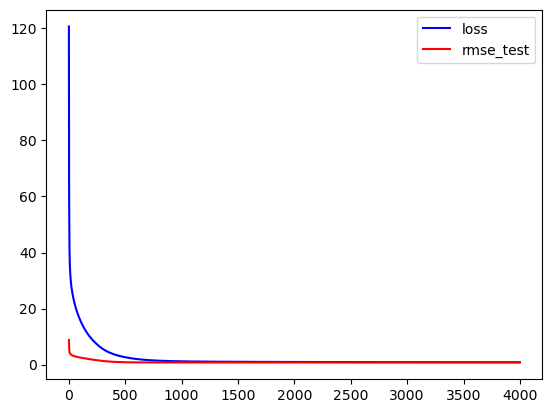

In [28]:
lr=0.001
wd=0.1
batch_size=10
torch.manual_seed(1234)

epochs=4000
losses=[]
rmse_test=[]
hidden_count=20
w1 = torch.normal(std=1, mean=0, size=(12, hidden_count), dtype=torch.float32, requires_grad=True)
w2 = torch.normal(std=1, mean=0, size=(hidden_count, 1), dtype=torch.float32, requires_grad=True)
b1=torch.zeros(hidden_count, requires_grad=True)
y_train_tensor=torch.tensor(y_train.values, dtype=torch.float32)
x_test_tensor=torch.tensor(x_test.values, dtype=torch.float32)
y_test_tensor=torch.tensor(y_test.values, dtype=torch.float32)
for i in range(epochs):
    losses_in_epoch=[]
    # trainiere jeweils mit einer kleinen Auswahl an Daten, der Batch
    # xb: ist die Auswahl der Daten für die Inputneuronen
    # yb: ist die Auswahl der Daten für die Outputneuronen
    for xb,yb in get_batch(x_train_tensor,y_train_tensor,batch_size):
        y_hat=relu(relu(xb@w1+b1)@w2)
        loss=torch.mean((yb-y_hat)**2)+(torch.sum(w1**2)+torch.sum(w2**2))*wd
        losses_in_epoch.append(loss.item())
        loss.backward()
        with torch.no_grad():
            w1.sub_(lr*w1.grad)
            w2.sub_(lr*w2.grad)
            b1.sub_(lr*b1.grad)
            w1.grad.zero_()
            w2.grad.zero_()
            b1.grad.zero_()
    losses.append(sum(losses_in_epoch)/len(losses_in_epoch))
    y_test_hat=relu(relu(x_test_tensor@w1+b1)@w2)
    y_test_rmse=root_mean_squared_error(y_test_hat, y_test_tensor)
    rmse_test.append(y_test_rmse.item())

plt.plot(range(epochs),losses, color="blue")
plt.plot(range(epochs),rmse_test, color="red")
plt.legend(["loss", "rmse_test"])
plt.show()


In [29]:
y_test_hat=relu(relu(x_test_tensor@w1+b1)@w2)
rmse_test=root_mean_squared_error(y_test_hat, y_test_tensor)
rmse_test.item()

0.7769781947135925

In [30]:
y_train_hat=relu(relu(x_train_tensor@w1+b1)@w2)
rmse_train=root_mean_squared_error(y_train_hat, y_train_tensor)
rmse_train.item()


0.8260756134986877

In [31]:
y_test_hat

tensor([[13.0309],
        [13.0149],
        [13.0083],
        [12.9372],
        [13.0651],
        [12.9157],
        [13.0528],
        [13.0296],
        [12.9996],
        [13.1241],
        [13.0482],
        [13.0224],
        [13.2596],
        [12.8814],
        [12.9519],
        [12.9250],
        [13.1572],
        [13.1312],
        [13.0849],
        [12.8745],
        [13.0534],
        [12.9835],
        [12.8915],
        [12.9509],
        [12.9092],
        [12.9788],
        [12.8676],
        [13.2192],
        [13.0107],
        [12.9932],
        [13.0198],
        [12.9531],
        [13.0549],
        [12.9782],
        [13.1648],
        [12.8503]], grad_fn=<MaximumBackward0>)